In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn import model_selection
from sklearn.metrics import r2_score,accuracy_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
521,32,female,44.220,0,no,southeast,3994.17780
461,42,male,30.000,0,yes,southwest,22144.03200
963,46,male,24.795,3,no,northeast,9500.57305
1282,18,female,21.660,0,yes,northeast,14283.45940
202,60,female,24.035,0,no,northwest,13012.20865
1045,43,female,24.700,2,yes,northwest,21880.82000
655,52,female,25.300,2,yes,southeast,24667.41900
645,48,male,30.780,3,no,northeast,10141.13620
138,54,female,31.900,3,no,southeast,27322.73386
154,40,female,25.460,1,no,northeast,7077.18940


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- terdapat 1338 baris dan 7 kolom
- tidak terdapat missing value
- pada kolum sex, smoker, dan region yang berupa data object akan diubah kedalam bentuk numerik untuk memaksimalkan pemodelan 

In [4]:
num = ['age', 'bmi', 'children', 'charges']
cat = ['sex', 'smoker', 'region']

In [7]:
df[num].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df[cat].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


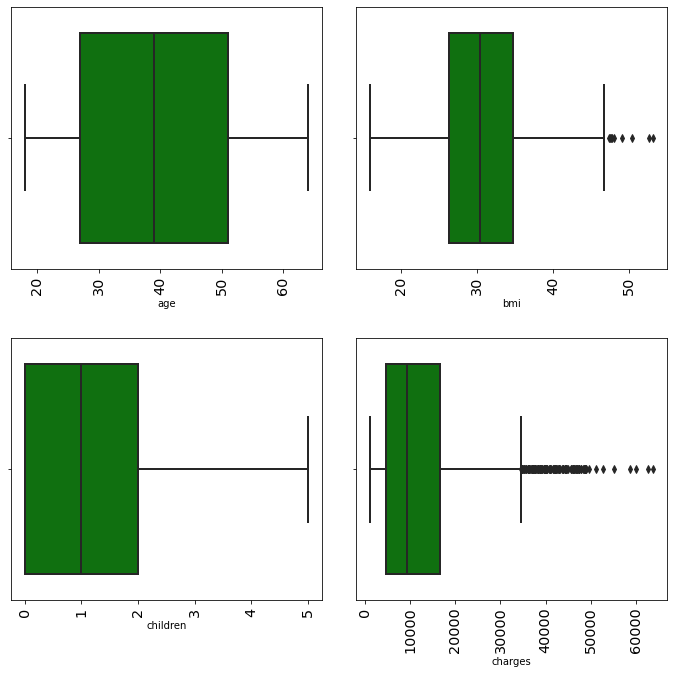

In [9]:
for i in range(0, len(num)):
    plt.subplot(2, len(num)/2, i+1)
    sns.boxplot(df[num[i]], color='green', orient='v')
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3)

- kolom age dan children tidak terdapat outlier
- pada kolom bmi dan charges terdapat outlier

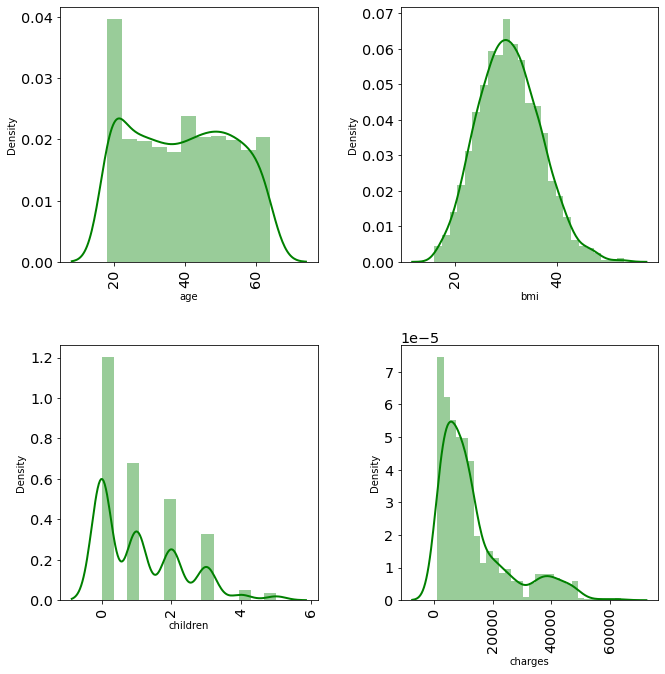

In [10]:
for i in range(0, len(num)):
    plt.subplot(2, len(num)/2, i+1)
    sns.distplot(df[num[i]], color='green')
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3)

- pada kolom bmi dan age data berdistribusi normal
- kolom children dan charges data berdistribusi skewned kanan apabila terdapat missing value data dapat diisi dengan median 
- pada kolom age data berdistribusi tidak normal terdapat missing value data dapat diisi dengan median atau modus

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

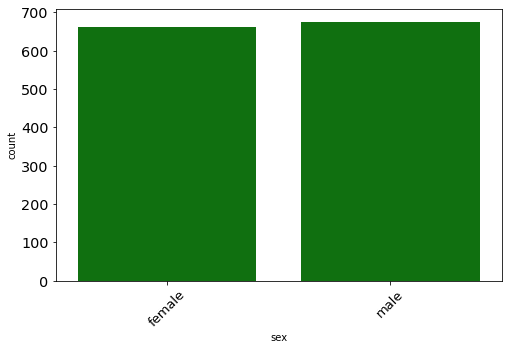

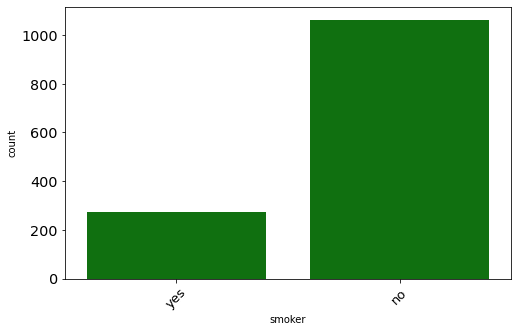

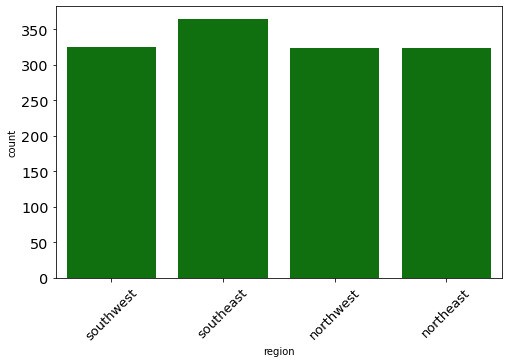

In [23]:
for i in range(0, len(cat)):
    plt.figure()
    sns.countplot(df[cat[i]], color='green')
    plt.xticks(rotation=45, fontsize=13)

1. mayoritas nasabah berjenis kelamin male(pria) 
2. mayoritas nasabah tidak merokok
3. mayoritas nasabah berasal daerah southeast

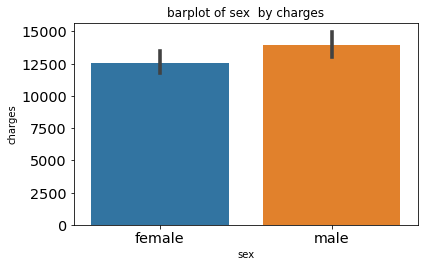

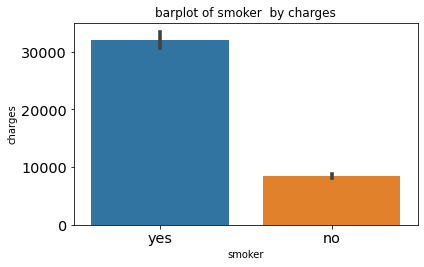

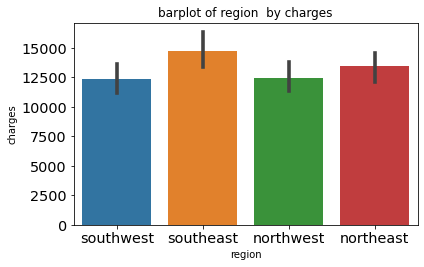

In [21]:
n=1
for i in cat:
    plt.figure(figsize=(6, 10))
    plt.subplot(3, 1, n+1)
    ax = sns.barplot(x=i, y='charges', data=df)
    plt.title("barplot of {}  by charges".format(i))
    plt.tight_layout()

1. berdasarkan gender, nasabah dengan jenis kelamin pria, memiliki biaya asuransi kesehataan lebih besar dibandingkan nasabah wanita.
2. nasabah yang perokok memiliki biaya asuransi kesehataan lebih besar dibandingkan nasabah yang bukan perokok
3. Dari total nasabah yang tercatat, nasabah yang berasal dari daerah southeast memiliki biaya asuransi kesehataan lebih besar dibandingkan nasabah dari daerah lainnya 
 

In [8]:
def gender_dist_plot(x_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=x_val, data=df, palette=['dodgerblue','lightpink'],hue='sex',hue_order=['male','female'],
                  orient='v',ax=ax,edgecolor='0.2') 
    ax.set_xlabel(title, fontsize=12,color='black')
    ax.tick_params(length=3,labelsize=12,labelcolor='black')
    ax.set_title(title +' Distribution by Gender', fontsize=13)
    x_axis = ax.axes.get_yaxis().set_visible(False)
    ax.legend(loc=[1,0.9],fontsize=12,title='Gender Type',ncol=2)
    sns.despine(left=True)
    return plt.show()

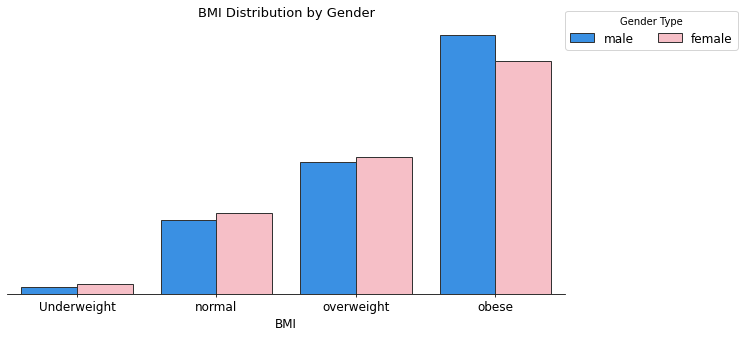

In [9]:
cut_points = [14,19,25,30,65]
label_names = ['Underweight',"normal","overweight","obese"]
df["bmi_cat"] = pd.cut(df['bmi'],cut_points,labels=label_names)
gender_dist_plot('bmi_cat','BMI')

mayoritas nasabah mengalami obesitas, dengan nasabah yang berjenis kelamin pria yang mendominasi obesitas

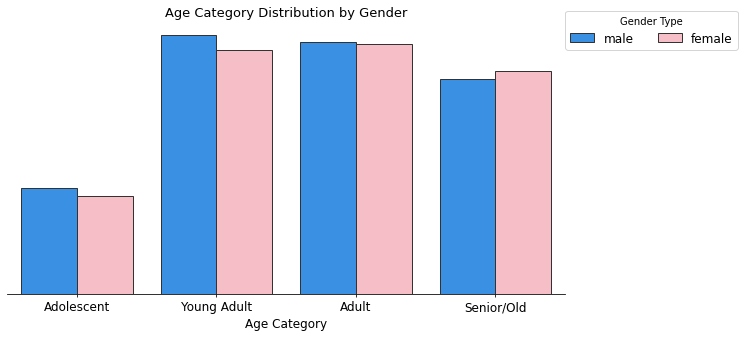

In [11]:
cut_points = [17,20,35,50,65]
label_names = ['Adolescent',"Young Adult","Adult","Senior/Old"]
df["age_cat"] = pd.cut(df["age"],cut_points,labels=label_names)
gender_dist_plot('age_cat','Age Category')

dari total nasabah yang tercatat mayoritas nasabah berusia dewasa mudah, dengan nasabah yang berjenis kelamin pria yang mendominasi

In [26]:
def gender_charges_bar_plot(x_val,y_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=x_val, y=y_val, data=df, palette=['dodgerblue','lightpink'],hue='sex',hue_order=['male','female'],
                  orient='v',ax=ax,edgecolor='0.2') 
    ax.set_xlabel(x_val, fontsize=12,color='black')
    ax.set_ylabel(y_val, fontsize=12,color='black')
    ax.set_title(title +' Distribution by Gender', fontsize=13)
    ax.legend(loc=[1,0.9],fontsize=12,title='Gender Type',ncol=2)
    return plt.show()
def smoker_charges_bar_plot(x_val,y_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=x_val, y=y_val, data=df, palette=['darkred','darkgreen'],hue='smoker',hue_order=['yes','no'],
                  orient='v',ax=ax,edgecolor='0.2') 
    ax.set_xlabel(x_val, fontsize=12,color='black')
    ax.set_ylabel(y_val, fontsize=12,color='black')
    ax.set_title(title +' Distribution by smoker', fontsize=13)
    ax.legend(loc=[1,0.9],fontsize=12,title='smoker Type',ncol=2)
    return plt.show()

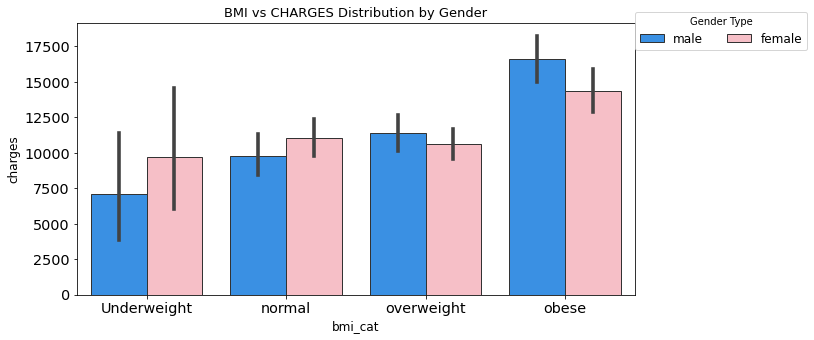

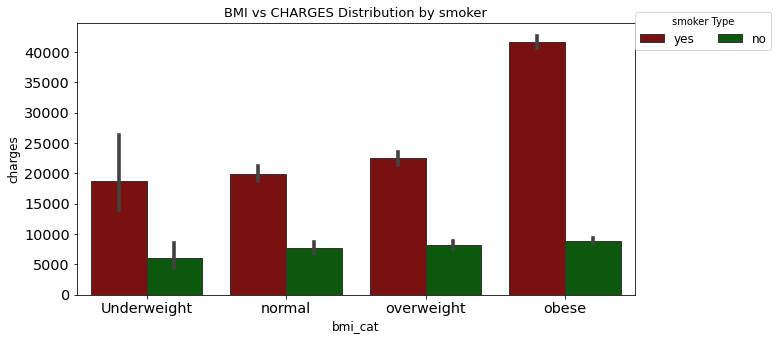

In [27]:
cut_points = [14,19,25,30,65]
label_names = ['Underweight',"normal","overweight","obese"]
df["bmi_cat"] = pd.cut(df['bmi'],cut_points,labels=label_names)
gender_charges_bar_plot('bmi_cat','charges','BMI vs CHARGES')
smoker_charges_bar_plot('bmi_cat','charges','BMI vs CHARGES')

nasabah yang mengalami obesitas dan perokok memiliki biaya asuransi kesehataan lebih besar dibandingkan nasabah lainnya

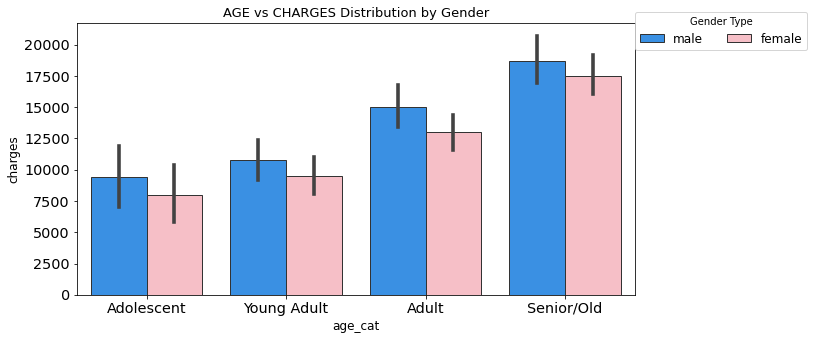

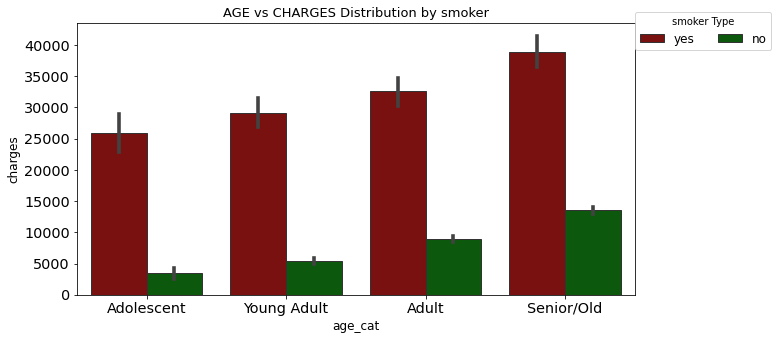

In [28]:
cut_points = [17,20,35,50,65]
label_names = ['Adolescent',"Young Adult","Adult","Senior/Old"]
df["age_cat"] = pd.cut(df["age"],cut_points,labels=label_names)
gender_charges_bar_plot('age_cat','charges','AGE vs CHARGES')
smoker_charges_bar_plot('age_cat','charges','AGE vs CHARGES')

nasabah yang senior/old dan perokok memiliki biaya asuransi kesehataan lebih besar dibandingkan nasabah lainnya

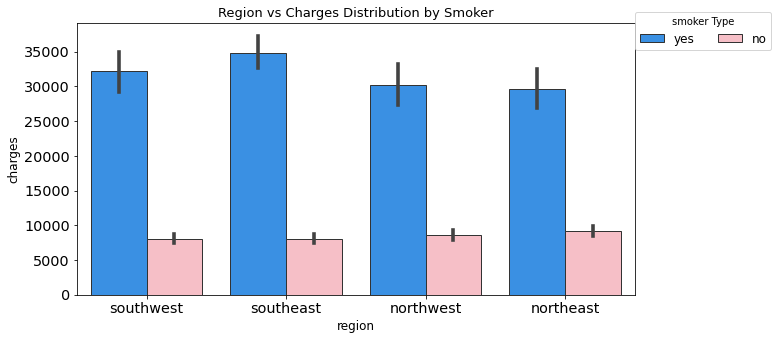

In [18]:
f,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='region', y='charges', data=df, palette=['dodgerblue','lightpink'],hue='smoker',hue_order=['yes','no'],orient='v',ax=ax,edgecolor='0.2') 
ax.set_xlabel('region', fontsize=12,color='black')
ax.set_ylabel('charges', fontsize=12,color='black')
ax.set_title('Region vs Charges Distribution by Smoker', fontsize=13)
ax.legend(loc=[1,0.9],fontsize=12,title='smoker Type',ncol=2)
plt.show()

untuk nasabah yang berada di wilayah southeast dan sebagai perokok memiliki biaya asuransi kesehataan lebih besar dibandingkan nasabah lainnya

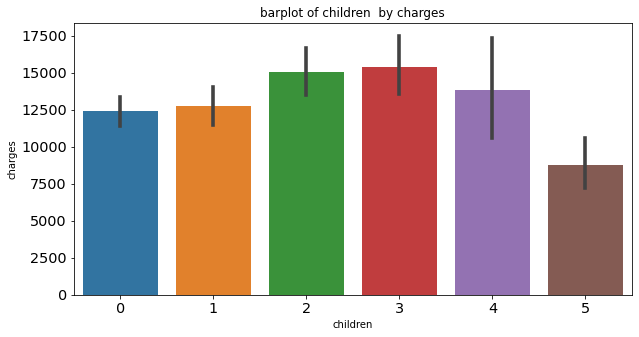

In [22]:
plt.subplots(figsize=(10,5))
ax = sns.barplot(x='children', y='charges', data=df)
plt.title("barplot of children  by charges")
plt.show()

nasabah yang memiliki tanggungan 5 anak memiliki biaya asuransi kesehatan lebih kecil 

In [29]:
from scipy import stats
print(f'jumlah baris sebelum difilter:{len(df)}')
filtered_entries = ([True] * len(df))
for col in ['bmi', 'charges']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
df2 = df[filtered_entries]
print(f'jumlah baris setelah difilter:{len(df2)}')

jumlah baris sebelum difilter:1338
jumlah baris setelah difilter:1327


In [30]:
df2.sample(5)

,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat
957,24,male,26.790,1,no,northwest,12609.88702,overweight,Young Adult
143,29,male,29.735,2,no,northwest,18157.87600,overweight,Young Adult
775,51,male,33.330,3,no,southeast,10560.49170,obese,Senior/Old
962,63,female,35.200,1,no,southeast,14474.67500,obese,Senior/Old
395,46,male,19.855,0,no,northwest,7526.70645,normal,Adult


In [31]:
df2 = df2.drop(['age_cat', 'bmi_cat'],1)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df3= pd.get_dummies(df2)
df3.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [33]:
X = df3.drop(['charges'],1)
y = df3['charges'].values
print(X.shape)
print(y.shape)

(1327, 11)
(1327,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [35]:
def rmse(targets,predictions):

    differences = predictions - targets                      

    differences_squared = differences ** 2                    

    mean_of_differences_squared = differences_squared.mean()  

    rmse_val = np.sqrt(mean_of_differences_squared)           

    return rmse_val

In [36]:
regressors = [LinearRegression(),
              Lasso(),
              Ridge(),
              ElasticNet(),
              RandomForestRegressor(n_estimators = 10, random_state=1),
              xgb.XGBRegressor(random_state=42)]

df = pd.DataFrame(columns = ['Method', 'Accuracy', 'MAE', 'RMSE', 'R2 Score'])
df

,Method,Accuracy,MAE,RMSE,R2 Score


In [37]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    method = str(type(regressor)).split('.')[-1][:-2]
    
    #Accuracy
    Accuracy  = regressor.score(X_train, y_train)
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred)
    
    #RMSE Score
    rmse_value = rmse(y_test, y_pred)
    
    #R2 Score
    r2 = r2_score(y_test, y_pred)
    
    df = df.append({'Method': method,
                    'Accuracy': Accuracy,
                    'MAE': mae, 
                    'RMSE': rmse_value,
                    'R2 Score': r2},
                     ignore_index=True)

In [38]:
df

,Method,Accuracy,MAE,RMSE,R2 Score
0,LinearRegression,0.741804,3717.738788,5251.583549,0.791025
1,Lasso,0.741804,3718.529846,5252.348893,0.790964
2,Ridge,0.741799,3723.919273,5253.796371,0.790849
3,ElasticNet,0.511729,5918.419399,7768.359233,0.542731
4,RandomForestRegressor,0.962240,2653.921826,4540.893869,0.843759
5,XGBRegressor,0.993177,2913.344987,4774.506174,0.827269


In [55]:
xg = XGBRegressor(ramdom_st)

xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

method = str(type(regressor)).split('.')[-1][:-2]

#Accuracy
Accuracy  = regressor.score(X_train, y_train)
print('Accuracy : ',Accuracy)    
# MAE score
mae = mean_absolute_error(y_test, y_pred)
print('MAE : ',mae)

#RMSE Score
rmse_value = rmse(y_test, y_pred)
print('RMSE : ',rmse_value)

#R2 Score
r2 = r2_score(y_test, y_pred)
print('R2 Score : ',r2)


Accuracy :  0.9931770486394694
MAE :  3455.6993710462066
RMSE :  4866.7857212744
R2 Score :  0.8205275906638145


<AxesSubplot:xlabel='importance', ylabel='index'>

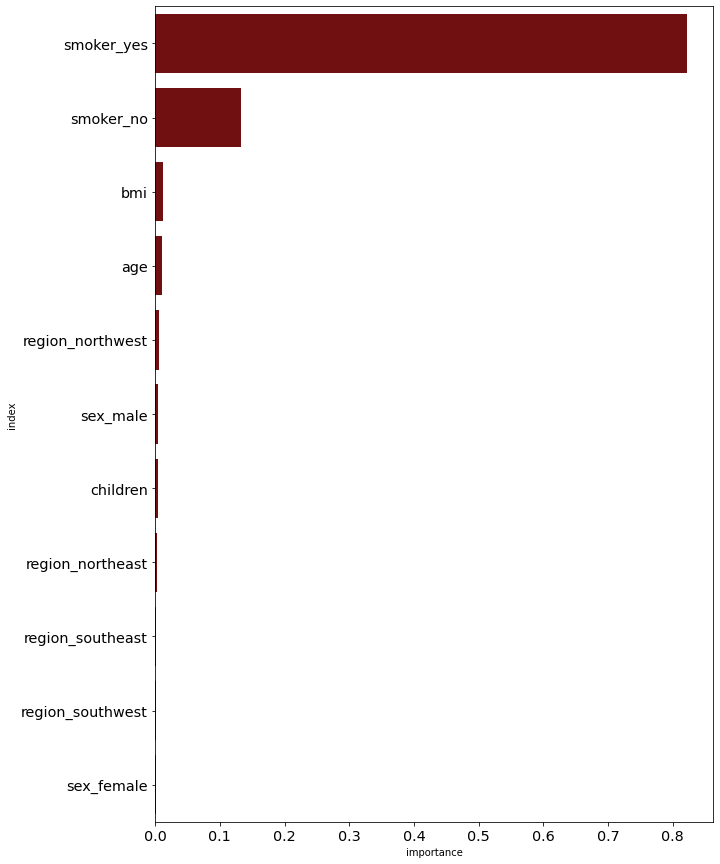

In [56]:
feature_importances = pd.DataFrame(xg.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index())

1. Model machine learning yang dibuat dengan membandingkan beberapa model machine
LinearRegression, Lasso, Ridge,  ElasticNet,RandomForestRegressor, xgb.XGBRegressor
2. Metrik evaluasi yang digunakan adalah R2 Score, MAE, RMAE.
3. Dari hasil perbandingan menggunakan cross validation, di dapatkan model terbaik, yaitu XGBRegressor.